# Random Forest

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.ensemble import RandomForestRegressor

Import OSNIR Dataset and shuffle data

In [62]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [63]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Random Forest Model

In [64]:
#model and fit
model = RandomForestRegressor(n_estimators=10, max_depth=10)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10)

In [65]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [66]:
OSNIR_est = (model.predict(Input_num))

In [67]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[26.0, -6.0, 50.0, 25.0, 0.0, 3.0] => 18.471639 (expected 18.511156)
[31.0, -6.0, 100.0, 25.0, 0.0, 9.0] => 7.981077 (expected 7.987254)
[9.0, -3.0, 50.0, 25.0, 0.0, 9.0] => 23.470292 (expected 23.617851)
[10.0, -4.0, 50.0, 25.0, 0.0, 9.0] => 23.145136 (expected 23.297298)
[37.0, 0.0, 10.0, 25.0, 0.0, 3.0] => 18.432586 (expected 18.498140)
[19.0, 1.0, 10.0, 50.0, 0.0, 9.0] => 22.852060 (expected 23.048913)
[19.0, -3.0, 10.0, 12.5, 0.0, 9.0] => 21.924381 (expected 21.762244)
[33.0, -3.0, 50.0, 25.0, 0.0, 3.0] => 18.421581 (expected 18.345297)
[34.0, 3.0, 10.0, 25.0, 12.5, 9.0] => 13.390954 (expected 13.341147)
[10.0, -3.0, 100.0, 25.0, 0.0, 3.0] => 15.895793 (expected 15.599807)


In [68]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [69]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_RF.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00033344, 0.00033344, 0.00100033, 0.00166722,
        0.003001  , 0.00500167, 0.00533511, 0.00866956, 0.02067356,
        0.02934311, 0.042014  , 0.0666889 , 0.12870957, 0.21273758,
        0.19139713, 0.13104368, 0.06935645, 0.03501167, 0.01833945,
        0.00966989, 0.00933645, 0.00366789, 0.00266756, 0.00233411,
        0.00033344, 0.00066689, 0.00066689, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

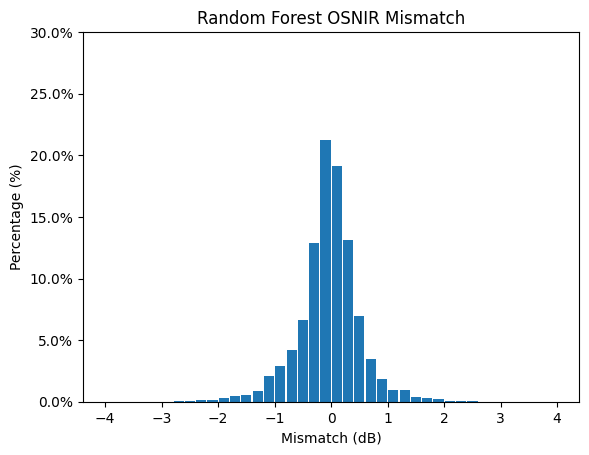

In [70]:
plt.title('Random Forest OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )